# Importing REQUIERD  LIBRARIES

In [1]:
import pandas as pd  # data analysis and manipulation tool
import numpy as np   # working with arrays.
import matplotlib.pyplot as plt   #  creating static, animated, and interactive visualizations
import seaborn as sns  # making statistical graphics i
import sklearn.datasets 
from sklearn.model_selection import train_test_split  # To split and create random train and test subsets

from sklearn import metrics  # measures of quantitative assessment commonly used for comparing, and tracking performance or production.


# importing the data .

In [2]:
house_data = sklearn.datasets.load_boston()

In [3]:
print(house_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

# installing the xgboost

In [4]:
pip! install xgboost

Note: you may need to restart the kernel to use updated packages.


'C:\Users\CHANDU' is not recognized as an internal or external command,
operable program or batch file.


 # Dimensional checks

In [5]:
hdata = pd.DataFrame(house_data.data, columns = house_data.feature_names )

In [6]:
hdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
hdata['price'] = house_data.target

In [8]:
hdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
hdata.shape

(506, 14)

In [10]:
hdata.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [11]:
hdata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# checking correlation between each and every variables in data

In [12]:
correlation = hdata.corr()

<AxesSubplot:>

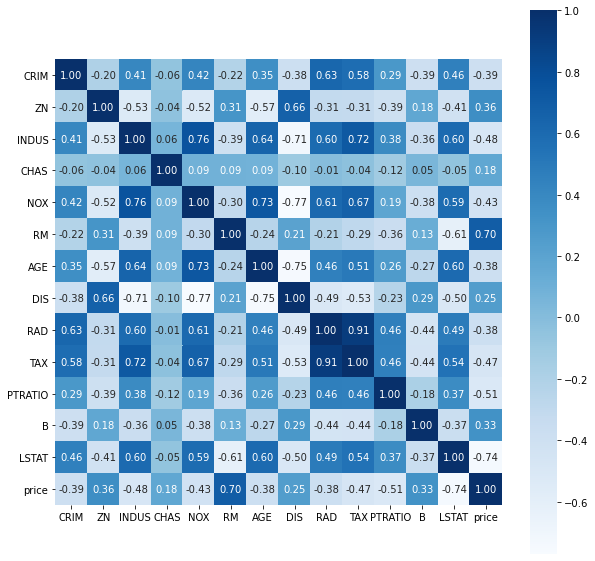

In [13]:
plt.figure(figsize =(10,10))
sns.heatmap(correlation, cbar = True, square =True, fmt= '.2f', annot = True, annot_kws = {'size':10}, cmap='Blues' )



# for regrssion dividing the data into x and y axis

# x axis as price

# y axis as parameters

In [14]:
x = hdata.drop('price', axis =1)

In [15]:
y = hdata.price

In [16]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [17]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

# split data into 2 divisions  testing and train

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [19]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


# XGBoost are execution speed and model performance.

In [20]:
import xgboost

from xgboost import XGBRegressor


In [21]:
model = XGBRegressor()

# train data fitting into the model

In [22]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# after training the model and we have to again the x_train values to be predict or tested

In [23]:
pred = model.predict(x_train)

In [24]:
print(pred)

[26.713207  21.701292  22.02775   22.868124  10.395801  21.904987
 20.584667  26.385653  41.29491   17.192427  27.086473  20.377207
 16.49928   24.398243   8.40001   23.010239   9.733422  49.995247
 30.525246  12.293014  19.407236  21.19768   20.26171   18.804638
 33.412464  18.500738  19.615505  33.185265  13.1022415  7.4997444
 13.595594  17.451708   8.401649  35.40025   23.973782  13.416968
 26.20242    7.2031536 13.079639  24.472313  37.207066  25.020262
 24.100767  16.629286  32.907604  36.17424   10.969644   7.1997232
 22.805359  28.699085  14.396688  24.457392  18.085678  22.501808
 20.499475  15.212611  17.405722  13.574249   8.708482  18.235569
 35.40542   31.69192   32.99239   22.187315  20.42349   23.924967
 25.019253  12.693822  29.102392  12.009193  17.731197  26.999647
 20.616138  10.208546  17.518984  19.697304  29.8043    20.501806
 14.894584  10.902646  19.487995  22.6867    19.485931  24.63077
 25.00895   24.48633   49.98668   14.301337  11.782878  30.987469
 28.69766

# now comparing the acccuracy of model which we trained and tested by comparing the y_train and y_pred or test results

# accuracy score  -- to know the prediction values and trained vales accuracy in predicting

In [25]:
from sklearn.metrics import accuracy_score

# accuray of predicted values by r- suqare and MAS score

In [26]:
score_1 = metrics.r2_score(y_train, pred)

In [27]:
score_2 = metrics.mean_absolute_error(y_train, pred)

In [28]:
print(("r2 suqared :" ,score_1 )
      , ("MAS : ", score_2))

('r2 suqared :', 0.999996496464714) ('MAS : ', 0.01223277148633904)


In [45]:
test_pred = model.predict(x_test)

In [46]:
score_11 = metrics.r2_score(y_test, test_pred)

In [47]:
score_22 = metrics.mean_absolute_error(y_test, test_pred)

In [48]:
print((score_11, score_22))

(0.7375983347457296, 2.7961763999041387)


# correlation between actual and predicted price values

Text(0, 0.5, 'pred price')

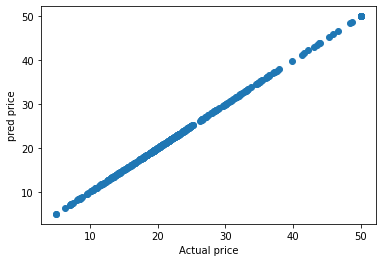

In [55]:
plt.scatter (y_train, pred)
plt.xlabel("Actual price")
plt.ylabel("pred price")